In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
df=pd.read_csv('C:/Users/Ankan/Downloads/final_gc_anolomy.csv')

In [2]:
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)
df  = df[df['building_number']==3]
df.tail()

,timestamp,main_meter,sub_meter_1,sub_meter_2,building_number,weekend,corporate,main_meter_4,main_meter_12,day of week_0,day of week_1,day of week_2,day of week_3,day of week_4,day of week_5,day of week_6
19795,2017-12-31 19:00:00,5892.065317,2024.088258,30.566824,3,1,1,7152.224294,7018.468642,0,0,0,0,0,0,1
19796,2017-12-31 20:00:00,5674.520581,1801.549560,27.771941,3,1,0,5768.009903,7018.468642,0,0,0,0,0,0,1
19797,2017-12-31 21:00:00,5793.176041,1852.839920,20.228918,3,1,0,5768.009903,7018.468642,0,0,0,0,0,0,1
19798,2017-12-31 22:00:00,5880.533421,2122.841577,28.554933,3,1,0,5768.009903,7018.468642,0,0,0,0,0,0,1
19799,2017-12-31 23:00:00,5723.809569,2168.024644,28.428637,3,1,0,5768.009903,7018.468642,0,0,0,0,0,0,1


In [3]:
df=df.drop(columns=['sub_meter_1','main_meter','building_number','weekend','corporate','main_meter_4','main_meter_12','day of week_0','day of week_1','day of week_2','day of week_3','day of week_4','day of week_5','day of week_6'])
df=df.set_index('timestamp')
df.head()

,sub_meter_2
timestamp,
2017-01-04 00:00:00,25.393842
2017-01-04 01:00:00,25.740699
2017-01-04 02:00:00,27.775870
2017-01-04 03:00:00,33.616777
2017-01-04 04:00:00,935.214389


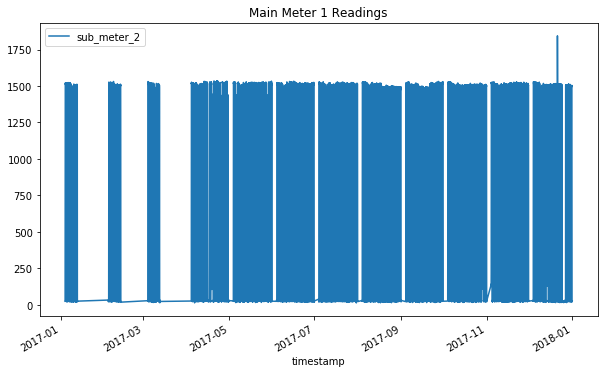

In [4]:
from plotly.offline import plot
import cufflinks as cf
df.plot(title="Main Meter 1 Readings", figsize=(10,6))

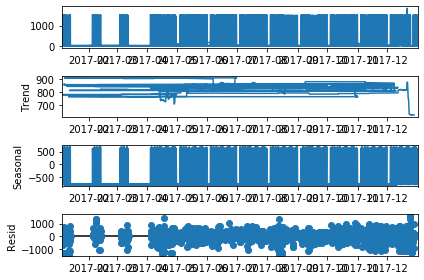

In [5]:
from chart_studio.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='additive',period=168)
fig=result.plot()

In [6]:
from pmdarima import auto_arima
stepwise_model = auto_arima(df, start_p=1, start_q=1,
                           max_p=5, max_q=5,
                           start_P=0, seasonal=False,
                           d=0, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

C:\Users\Ankan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

C:\Users\Ankan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning:

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.



Fit ARIMA: order=(1, 0, 1); AIC=94770.915, BIC=94798.095, Fit time=1.036 seconds
Fit ARIMA: order=(0, 0, 0); AIC=105484.163, BIC=105497.753, Fit time=0.002 seconds
Fit ARIMA: order=(1, 0, 0); AIC=95461.400, BIC=95481.784, Fit time=0.047 seconds
Fit ARIMA: order=(0, 0, 1); AIC=99407.361, BIC=99427.746, Fit time=0.145 seconds
Fit ARIMA: order=(2, 0, 1); AIC=94300.810, BIC=94334.784, Fit time=2.618 seconds
Fit ARIMA: order=(2, 0, 0); AIC=94673.445, BIC=94700.624, Fit time=0.060 seconds
Fit ARIMA: order=(2, 0, 2); AIC=94172.029, BIC=94212.798, Fit time=1.544 seconds
Fit ARIMA: order=(3, 0, 3); AIC=93160.761, BIC=93215.120, Fit time=10.719 seconds
Fit ARIMA: order=(2, 0, 3); AIC=94095.790, BIC=94143.354, Fit time=3.454 seconds
Fit ARIMA: order=(4, 0, 3); AIC=93629.471, BIC=93690.625, Fit time=17.077 seconds
Fit ARIMA: order=(3, 0, 2); AIC=94144.134, BIC=94191.698, Fit time=2.452 seconds
Fit ARIMA: order=(3, 0, 4); AIC=93145.186, BIC=93206.339, Fit time=9.934 seconds
Fit ARIMA: order=(4, 0, 

In [8]:
train = df.loc['01-04-2017 00:00:00':'07-11-2017 00:00:00']
test = df.loc['07-11-2017 00:00:00':]
stepwise_model.fit(train)

LinAlgError: SVD did not converge

In [9]:
future_forecast = stepwise_model.predict(n_periods=1320)
future_forecast

array([ 32.80541616,  66.39298886, 135.81822893, ..., 446.15722228,
       323.4852213 , 235.40344521])

In [10]:
a=pd.DataFrame(data=future_forecast)
a.to_csv('updatedb3m3.csv')

# add the code to show actual vs predicted
